# <div align="center">  Measuring Performance </div>

## 混淆矩阵(Confusion Matrix)

![](https://gitee.com/qrsforever/blog_source_assets/raw/master/AI/TPFN_convid19.png)

例如:

    望京SOHO,有家公司研发出一台通过超级红外即可判别某人是否得了新冠, 为了验证这台机器是否靠谱, 对100人样本进行测试, 其中有10人感染了新冠, 分析以下指标对该产品进行可信度评估.
    经过测试, 该机器诊断出12人为新冠患者(8人为真患者positive, 4人为健康人negative), 那么88人中存在2人为真患者, 86人为健康人.
    
真实结果|预测值|人数|解释
:--:|:--:|:--:|:------
<img width="100"/>|<img width="100"/>|<img width="200"/>|<img width="400"/>
T(真)|P(阳性)| 8 | 
F(假)|P(阳性)| 4 |(假阳性, 健康人被机器错误的判断为了阳性, 发生第一类错误)
F(假)|N(阴性)| 2 |(假阴性, 新冠患者没能被机器识别出(阳性), 错误的将其判为健康人, 发生第二类错误(严重))
T(真)|N(阴性)| 86|

## 准确率(Accuracy)

预测正确的结果占总样本的百分比

> $$
  Accuracy = \dfrac{TP + TN}{TP + NP + TN + FN} = \dfrac{8 + 86}{100} = \dfrac{94}{100}
  $$
  
当遇到不平衡的样本时, 准确率不能作为可靠的指标对系统进行评估, 就如上面的新冠病毒的例子, 一般患有新冠的人(阳性)数比较少(10人), 实际情况会更少, 那么系统(机器)把所有人都预测为健康人(阴性), 这种情况下计算出的$Accuracy = \dfrac{90}{100} = 90\%$, 然而这是不可靠的.

## 特异性(Specificity / True Negative Rate)


> $$
  Specificity = TNR = \dfrac{TN}{TN + FP} = \dfrac{86}{86 + 4} = \dfrac{86}{90}
  $$

**分母为真实样本中阴性数量, 从真实样本中, 分辨出阴性的概率, 检测出健康人(阴性)的能力**

如果机器作弊把100人都识别为患者, 则$TN=0, FP=90$没有检测出阴性的人, 所以 $Specificity = 0\%$, 检测不出健康的人.

## 假阳性率/误诊率/第一类错误(False Positive Rate)

> $$
  FPR = \dfrac{FP}{FP + TN} = 1 - Specificity = \dfrac{4}{4 + 86} = \dfrac{4}{90}
  $$
 
**分母为真实样本中阴性数量, 误诊率, 没有病却被判为有病所在的比例 (犯第一类错误, 误诊)**

## 假阴性率/漏诊率/第二类错误(False Negative Rate)


> $$
  FNR = \dfrac{FN}{FN + TP} = 1 - Recall = \dfrac{2}{2 + 8} = \dfrac{2}{10}
  $$
 
**分母为真实样本中阳性数量, 漏诊率, 患者却被判为无病所在的比例 (犯第二类错误, 漏诊)**

## 灵敏度/召回率/真阳性率/命中率(Sensitivity / Recall / True Positive Rate/Hit Rate)

实际为阳性的样本(10个)中被预测为阳性样本(8个)的概率, 还有个名字叫**查全率**

> $$
  Sensitivity = \dfrac{TP}{TP + FN} = \dfrac{8}{8 + 2} = \dfrac{8}{10}
  $$

**分母为真实样本中阳性数量, 从真实样本中, 分辨出阳性的概率, 检测出有病人(阳性)的能力**

Sensitivity/Recall 表示能够识别出新冠患者的能力(越高越好), 不能只从这一个指标衡量模型(机器)的可靠与否, 比如,

机器作弊把100人都识别为患者, 则$TP=10, FN=0$, 所以$Sensitivity/Recall = 100\%$, 机器太灵敏过度了.

## 精确度/阳性预测值(Precision/Positive Predictive Value)

被预测成阳性样本中(12个)中, 真正阳性样本的概率, 还有个名字叫**查准率**

> $$
  Precision = \dfrac{TP}{TP + FP} = \dfrac{8}{8 + 4} = \dfrac{8}{12}
  $$

**分母为机器检测出阳性的数量, 预测的结果中阳性所在比例**

如果机器作弊把100人都识别为患者, 则$TP=10, FP=90$, 所以$Precision = \dfrac{10}{10 + 90} = \dfrac{10}{100}$, 虽然召回率为100%, 但是精确度太低, 机器一样不靠谱(样本不平衡).

## F1-Score

查准率(精确度Precision)和查全率(召回率Recall)是负相关的关系, 如果要提升查准率, 必然将条件设置的严格一些(决策阀值大)，以尽可能将反例(90)排除, 将会导致部分阳性也排除(漏诊), 查全率也就会下降. 同样, 如果要提升查全率, 必将条件设置的宽松一些(决策阀值小), 以尽可能将阳性包含进来, 这就导致部分阴性的也被包含, 查准率就会下降.

F1-Score是为了平衡查准率和查全率两个指标的关系.

$$
F_1 = \dfrac{2 * Precision×Recall}{Precision+Recall}
$$

## AUROC(Area Under ROC) 

### 决策阀值(Decision thresholds)

对于分类问题, 当模型(机器)在给定的样本(人)输入计算出预测的概率后, 需要根据一个阀值来将预测概率(>0.9)转为预测的分类标签(新冠还是健康人). 有了分类标签才能计算出上图的混淆矩阵. 不同的阀值形成不同的混淆矩阵, 进而计算出的AUROC也不相同.

决策阀值的设置需要依赖具体的问题设置, 针对筛选新冠人, 我认为条件要宽松一些(阀值要小), 尽量不要有漏网的(漏诊的), 漏诊的后果相对严重. 如果设置threshhold=0.99,那么只有预测概率大于0.99的才被认为阳性(得了新冠), 条件严格, 部分阳性被判为阴性.

- 决策阀值$\theta=0$
 > 全部样本都被预测为阳性
 $$
 \begin{align*}
     FN &= 0 \\
     TN &= 0 \\
     TPR &= \dfrac{TP}{TP + FN} = 1 \\
     NPR &= \dfrac{FP}{FP + TN} = 1
 \end{align*}
 $$

- 决策阀值$\theta=1$
 > 全部样本都被预测为阴性
 $$
 \begin{align*}
     TP &= 0 \\
     FP &= 0 \\
     TPR &= \dfrac{TP}{TP + FN} = 0 \\
     NPR &= \dfrac{FP}{FP + TN} = 0
 \end{align*}
 $$

### ROC(Receiver Operating Characteristics)

TPR(灵敏度/召回率)和NPR(假阳性率)都是关于实际(金标准)样本中阳性和阴性来观察相关的概率问题, TPR是实际样本中**阳性**被覆盖的概率, 而NPR则是实际样本中**阴性**被覆盖的概率(错误的预测为阳性), 不受因样本不平衡带来的问题(精确度不一样)的影响.  **以实际结果为条件的指标都不受样本不平衡的影响，相反以预测结果为条件的就会受到影响。**

ROC（Receiver Operating Characteristic）曲线，又称接受者操作特征曲线。该曲线最早应用于雷达信号检测领域，用于区分信号与噪声。后来人们将其用于评价模型的预测能力，ROC曲线是基于混淆矩阵得出的。

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis.


![AUROC](https://gitee.com/qrsforever/blog_source_assets/raw/master/AI/auroc/auroc.png)

Point|Figure|Description 
:-:|:--:|:----
A|![][auc_A]|所有阳性的被正确的分辨出, 所有阴性的都被错误的判别为阳性; <br>决策阀值$\theta=0$, 把全样本都预测为阳性. 如果真实样本阳性和阴性人数相等(平衡样本), 这精确度(Precision)结果为0.5, 如果阳性比阴性的人多(偏依样本), 则精确度结果大于0.5, 相反阴性人比阳性的多, 这精确度会小于0.5
B|![][auc_B]|决策阀值$\theta>0, 值很小$; 阴性的人有少量分对了.
C,D|![][auc_CD]| 决策阀值$\theta$不断提高
E|![][auc_E]|所有阴性的人都被正确的分类


[auc_A]: https://gitee.com/qrsforever/blog_source_assets/raw/master/AI/auroc/auc_A.png

[auc_B]: https://gitee.com/qrsforever/blog_source_assets/raw/master/AI/auroc/auc_B.png

[auc_CD]: https://gitee.com/qrsforever/blog_source_assets/raw/master/AI/auroc/auc_CD.png

[auc_E]: https://gitee.com/qrsforever/blog_source_assets/raw/master/AI/auroc/auc_E.png

TPR 越高，同时 FPR 越低（即 ROC 曲线越陡），那么模型的性能就越好。

### AUC (Area Under Curve)

**AUC-ROC curve is only for binary classification problems**

ROC 曲线越陡越好，所以理想值就是 1，一个正方形，而最差的随机判断都有 0.5，所以一般 AUC 的值是介于 0.5 到 1 之间的。

AUC 的一般判断标准:

区间| |效果 
---:|:--:|:-----
<img width=200px/>|<img width=200px>|<img width=450px/>
0.5 - 0.7| |效果较低
0.7 - 0.85| |效果一般
0.85 - 0.95| |效果很好
0.95 - 1| |效果非常好，但一般不太可能

AUC的值的大小表示系统模型(机器)对样本的分类能力.

### AUC多分类

采用"one over rest(all)"方式, 将要预测的类设置为阳性, 其他的类作为阴性, 计算出该分类的auc分数, 
其他分类的auc分数的计算以同样的方式进行, 假设有10个分类, 随后计算出的10个分类在做一次平均值即可(该方式为"macro"平均)

### Codes

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

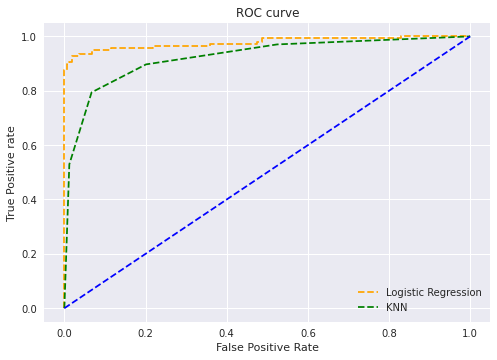

In [2]:
plt.style.use('seaborn')
## Binary-Class Classification

# Make Data

X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

# Logist Vs Knn

log_rgr = LogisticRegression()
knn_cls = KNeighborsClassifier(n_neighbors=4)

log_rgr.fit(X_train, y_train)
knn_cls.fit(X_train, y_train)

log_pred_prob = log_rgr.predict_proba(X_test)
knn_pred_prob = knn_cls.predict_proba(X_test)

# ROC curve

fpr1, tpr1, threshold1 = roc_curve(y_test, log_pred_prob[:,1], pos_label=1)
fpr2, tpr2, threshold2 = roc_curve(y_test, knn_pred_prob[:,1], pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot([0, 1], [0, 1], '--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best');

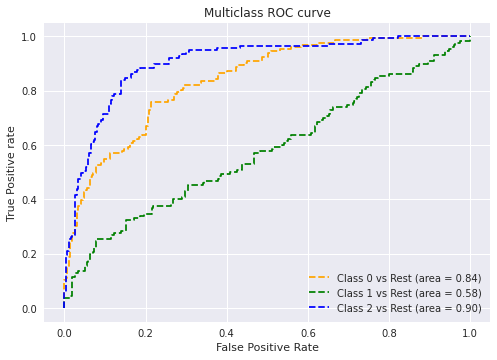

In [3]:
## Multi-Class Classification

### Make Data

X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### Model

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

for i, c in enumerate(('orange', 'green', 'blue')):    
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--',color=c, label='Class %d vs Rest (area = %0.2f)' % (i, roc_auc))
    
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best');

# References

#. https://glassboxmedicine.com/2019/02/17/measuring-performance-the-confusion-matrix
#. https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc/
#. https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
#. https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
#. http://bookshadow.com/weblog/2014/06/10/precision-recall-f-measure
#. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/